In [22]:
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy  
%load_ext autoreload
%autoreload 2

# Import model
from solve_consumption_saving import *
from Model import ReferenceDependenceClass

model_euler = ReferenceDependenceClass()
model_VFI = deepcopy(model_euler)

# Set one model to use EGM and one to use VFI
model_euler.par.euler = True
model_VFI.par.euler = False

# Set both models to consumption saving
model_euler.par.model = 'ConSav'
model_VFI.par.model = 'ConSav'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# **EGM and VFI Comparison** #

Solve value of employment with EGM and VFI

In [23]:
# Using EGM
value_function_employment_ConSav(model_euler.par, model_euler.sol)

In [24]:
# Using VFI
value_function_employment_ConSav(model_VFI.par, model_VFI.sol)

Inspect policy functions

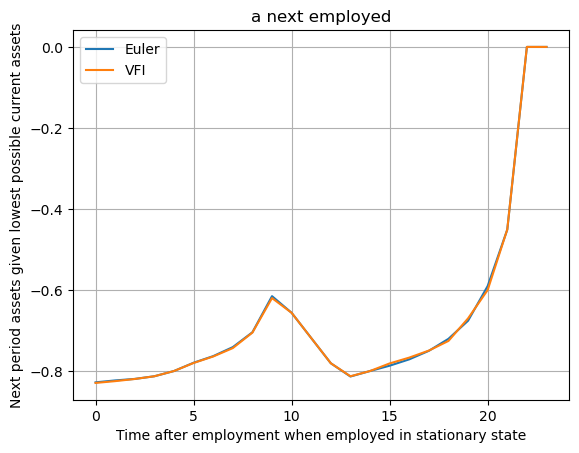

In [34]:
plt.plot(model_euler.sol.a_next_e[-1,:,0], label='Euler')
plt.plot(model_VFI.sol.a_next_e[-1,:,0], label='VFI')
plt.ylabel('Next period assets given lowest possible current assets')
plt.xlabel('Time after employment when employed in stationary state')
plt.title('a next employed')
plt.legend()
plt.grid(True)
plt.show()

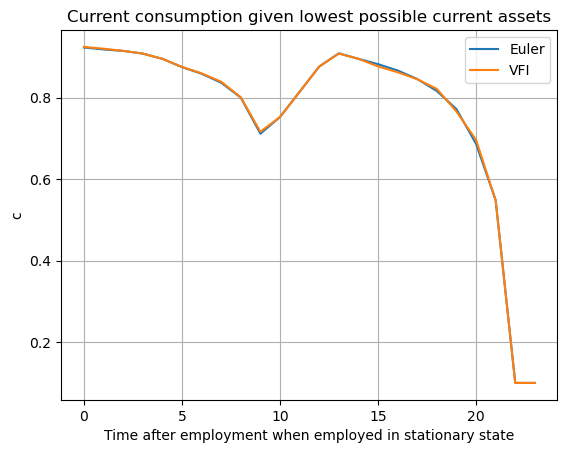

In [36]:
plt.plot(model_euler.sol.c_e[-1,:,0], label='Euler')
plt.plot(model_VFI.sol.c_e[-1,:,0], label='VFI')
plt.ylabel('c')
plt.title('Current consumption given lowest possible current assets')
plt.xlabel('Time after employment when employed in stationary state')
plt.legend()
plt.grid(True)
plt.show()

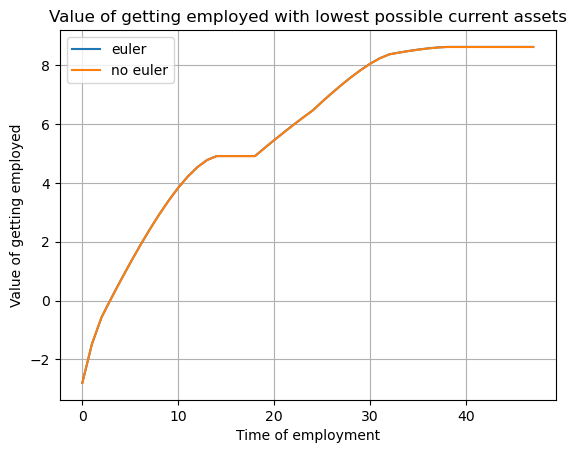

In [42]:
plt.plot(model_euler.par.V_e[:, 0, 0], label='euler')
plt.plot(model_VFI.par.V_e[:, 0, 0], label='no euler')
plt.title('Value of getting employed with lowest possible current assets')
plt.ylabel('Value of getting employed')
plt.xlabel('Time of employment')
plt.legend()
plt.grid(True)


Solve entire model to get search behaviour

In [38]:
model_euler.solve_ConSav()

array([0.23283354, 0.25683474, 0.27735664, 0.28393987, 0.26635472,
       0.24958459, 0.23410516, 0.2203963 , 0.20893185, 0.20020126,
       0.19476476, 0.19336321, 0.19712011, 0.20793768, 0.2293709 ,
       0.26113187, 0.3129212 , 0.41382012, 0.40641349, 0.40020146,
       0.39715933, 0.39952531, 0.41149231, 0.44237217, 0.42399671,
       0.40518826, 0.38633975, 0.36800416, 0.35088599, 0.33581336,
       0.32368679, 0.31535964, 0.31118931, 0.30738534, 0.30407095])

In [39]:
model_VFI.solve_ConSav()

array([0.23307993, 0.2568912 , 0.27739559, 0.28393732, 0.26635226,
       0.24958226, 0.234103  , 0.22039437, 0.20893032, 0.2002    ,
       0.19476379, 0.19336257, 0.19711986, 0.20793795, 0.22937197,
       0.26113433, 0.31292649, 0.41384269, 0.40641107, 0.40019908,
       0.39715699, 0.39952298, 0.4114899 , 0.44236944, 0.42399396,
       0.40518553, 0.38633699, 0.36800138, 0.35088337, 0.33581079,
       0.32368426, 0.31535715, 0.31118683, 0.30738287, 0.3040685 ])

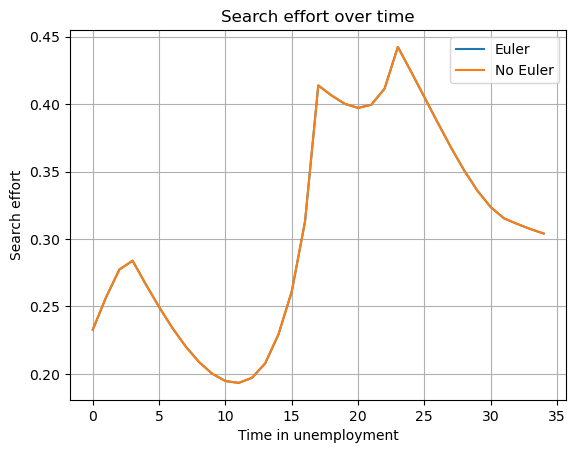

In [43]:
sim_euler = model_euler.sim.s_total
sim_VFI = model_VFI.sim.s_total

plt.plot(sim_euler, label='Euler')
plt.plot(sim_VFI, label = 'No Euler')
plt.title('Search effort over time')
plt.ylabel('Search effort')
plt.xlabel('Time in unemployment')
plt.legend()
plt.grid(True)
plt.show()

Simulate consumption and savings path after employment to see how debt is paid off

In [44]:
solve_forward_employment_ConSav(0, model_euler.par, model_euler.sol, model_euler.sim)
solve_forward_employment_ConSav(0, model_VFI.par, model_VFI.sol, model_VFI.sim)

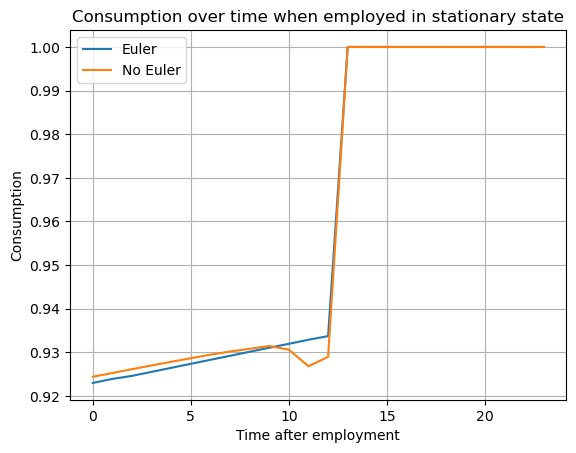

In [49]:
plt.plot(model_euler.sim.c_e[-1,:], label='Euler')
plt.plot(model_VFI.sim.c_e[-1,:], label='No Euler')
plt.title('Consumption over time when employed in stationary state')
plt.legend()
plt.ylabel('Consumption')
plt.xlabel('Time after employment')
plt.grid(True)

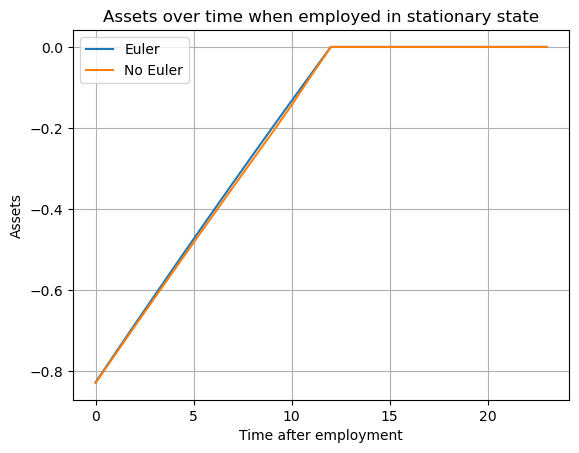

In [50]:
plt.plot(model_euler.sim.a_e[-1,:], label='Euler')
plt.plot(model_VFI.sim.a_e[-1,:], label='No Euler')
plt.title('Assets over time when employed in stationary state')
plt.ylabel('Assets')
plt.xlabel('Time after employment')
plt.legend()
plt.grid(True)